In [179]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D 
from dataclasses import dataclass
from sklearn.metrics import confusion_matrix

In [180]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session

Saving Lab3_data.xls to Lab3_data (4).xls


In [181]:
@dataclass
class LogisticRegression:
    learningRate: float
    maxIteration: int
    epsilon: float
    removeIndex: []
       
    def __post_init__(self):
        self.readDataset()
        
    def readDataset(self):
        """ 

        This function reads the dataset from a file and splits it into training and test sets

        """
        X_train = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2005 Data')
        X_test = pd.read_excel('Lab3_data.xls', sheet_name = '2004--2007 Data')
               
        X_train = self.remove_index(X_train)
        
        self.y_train = X_train.values[:,0]
        self.y_test = X_train.values[:,0]
        self.X_train = X_train.values[:,1:]
        self.X_test = X_train.values[:,1:]
    def remove_index(self, X):
        """
        This function removes the features specified in the removeIndex attribute from the dataset. 
        """
        X = X.drop(self.removeIndex)
        return X
        
    def sigmoid(self, z):
        """
        This function that maps real numbers to the range [0,1]. 
        Used to convert the output of the logistic regression model from a real number to a probability.
        """
        sig = 1 / (1 + np.exp(-z))
        return sig 
    
    def costFunction(self, X, y):
        """
        Compute cost function using SSE
        Args:
            X: Input matrix
            y: Response variable
            sig: sigmoid

        Returns: Cost function
        """
        sig = self.sigmoid(X.dot(self.w))
        loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
        cost = - loss.sum()
        return cost 
    
    def gradient(self, X, y):
        """
        Compute gradient of the cost function
        Args:
            X: Input matrix
            y: Response variable
            sig: sigmoid

        Returns: Gradient
        """
        sig = self.sigmoid(X.dot(self.w))
        return (sig - y).dot(X)
        
    def gradientDescent(self, X, y):
        """
        Train the model using gradient descent
        Args:
            X: Input matrix
            y: Response variable

        Returns: Model
        """
        errors = []
        prev_error = float('inf')
        for i in tqdm(range(self.maxIteration), colour = 'red'):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            current_error = self.costFunction(X, y)
            errors.append(current_error)
            
            if np.abs(prev_error - current_error) < self.epsilon:
                print("The model stopped learning")
                break
            prev_error = current_error
            
        self.plot_cost(errors)
        
    def predict(self, X):
        """
        Predict the class labels for the given input data.

        Args:
        X: Input data.

        Returns:
        Predicted class labels.
        """
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        """
        Evaluate the performance of the model on the given input data.
        Args:
            X: Input matrix
            y: Response variable

        Returns: Accuracy, precision, and recall
        """
        y = y == 1
        y_hat = y_hat == 1
        
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        f_score = 2 * (precision * recall) / (precision + recall)
        return precision, recall, f_score
    
    def fit(self):
        """
        Fit the model to the training data.

        Args:
        X_train: Training data.
        y_train: Target values for the training data.

        Returns:
        self
        """
        self.w = np.ones(self.X_train.shape[1], dtype=np.float64)
        self.gradientDescent(self.X_train, self.y_train)
        
        y_hat_train  = self.predict(self.X_train)
        precision, recall, f_score = self.evaluate(self.y_train, y_hat_train)
        
        print("The model has precision of {}".format(precision))
        print("The model has recall of {}".format(recall))
        print("The model has F1_score of {}".format(f_score))
        print("The weights are {}".format(self.w))
          
        
    def plot_cost(self,cost_sequence):
        
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig, ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel = 'iterations', ylabel = 'cost' , title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor=(1.05,1), loc=2,shadow=True)
        plt.show()
        
       
        
    def plot(self):
        plt.figure(figsize=(12,8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

In [182]:
# Training the model without removing index (outliers)
lr = LogisticRegression(epsilon=0.00001, learningRate = 0.000001, maxIteration = 100000, removeIndex = [])


  0%|          | 0/100000 [00:00<?, ?it/s]<ipython-input-181-20953e170db0>:52: RuntimeWarning: divide by zero encountered in log
  loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
<ipython-input-181-20953e170db0>:52: RuntimeWarning: invalid value encountered in multiply
  loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
 44%|████▍     | 43773/100000 [00:02<00:02, 19016.60it/s]


The model stopped learning


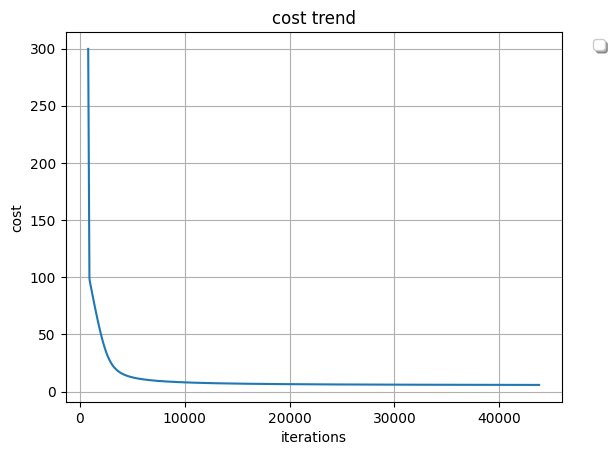

The model has precision of 0.9722222222222222
The model has recall of 0.9722222222222222
The model has F1_score of 0.9722222222222222
The weights are [-0.45217568  0.21934251]


In [183]:
lr.fit()


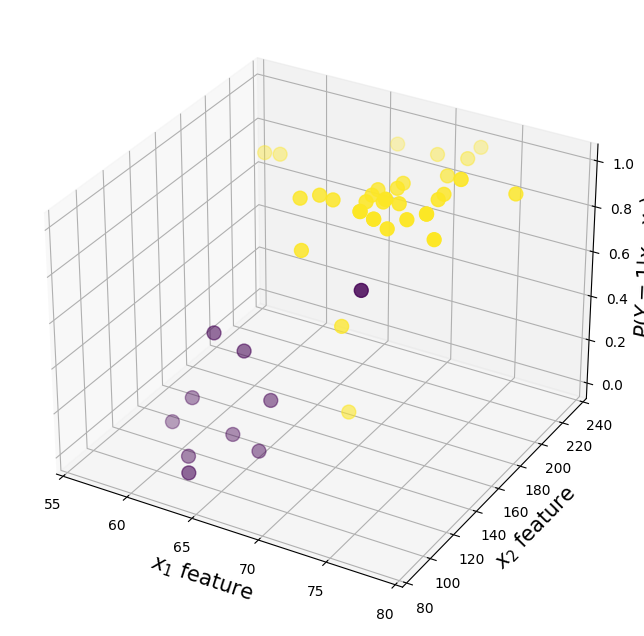

In [184]:
lr.plot()


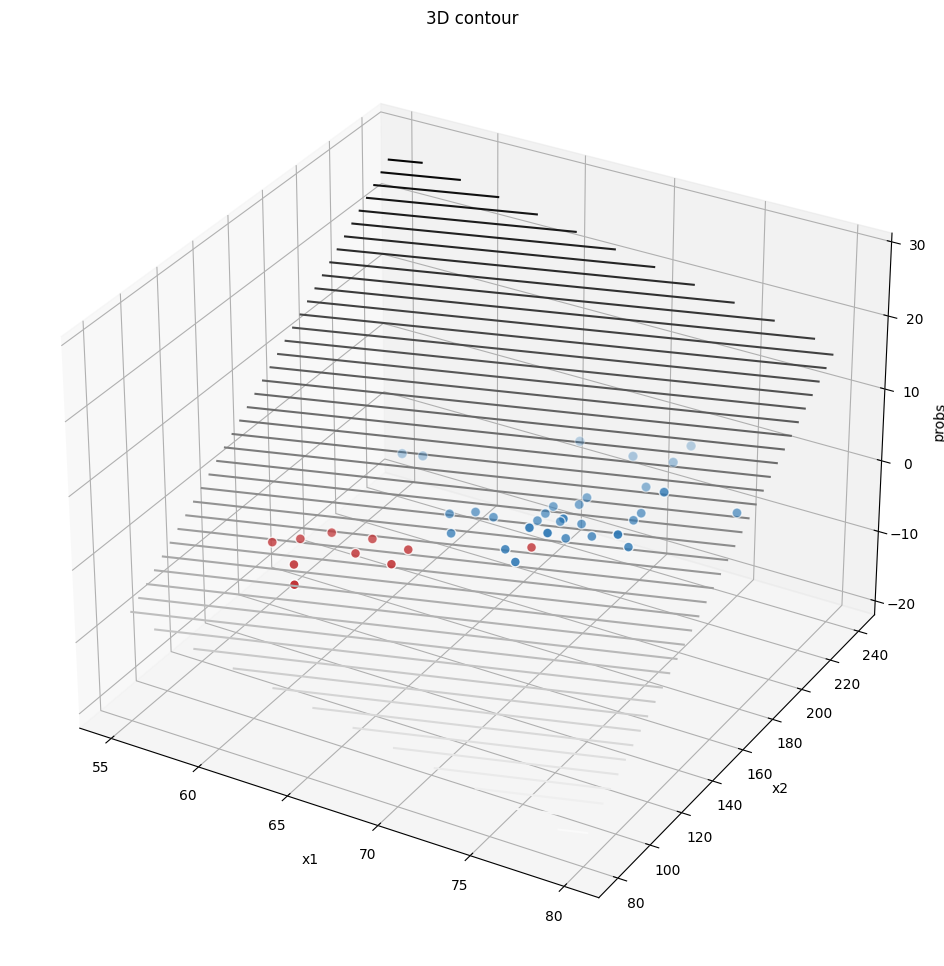

In [185]:
lr.plot3D()


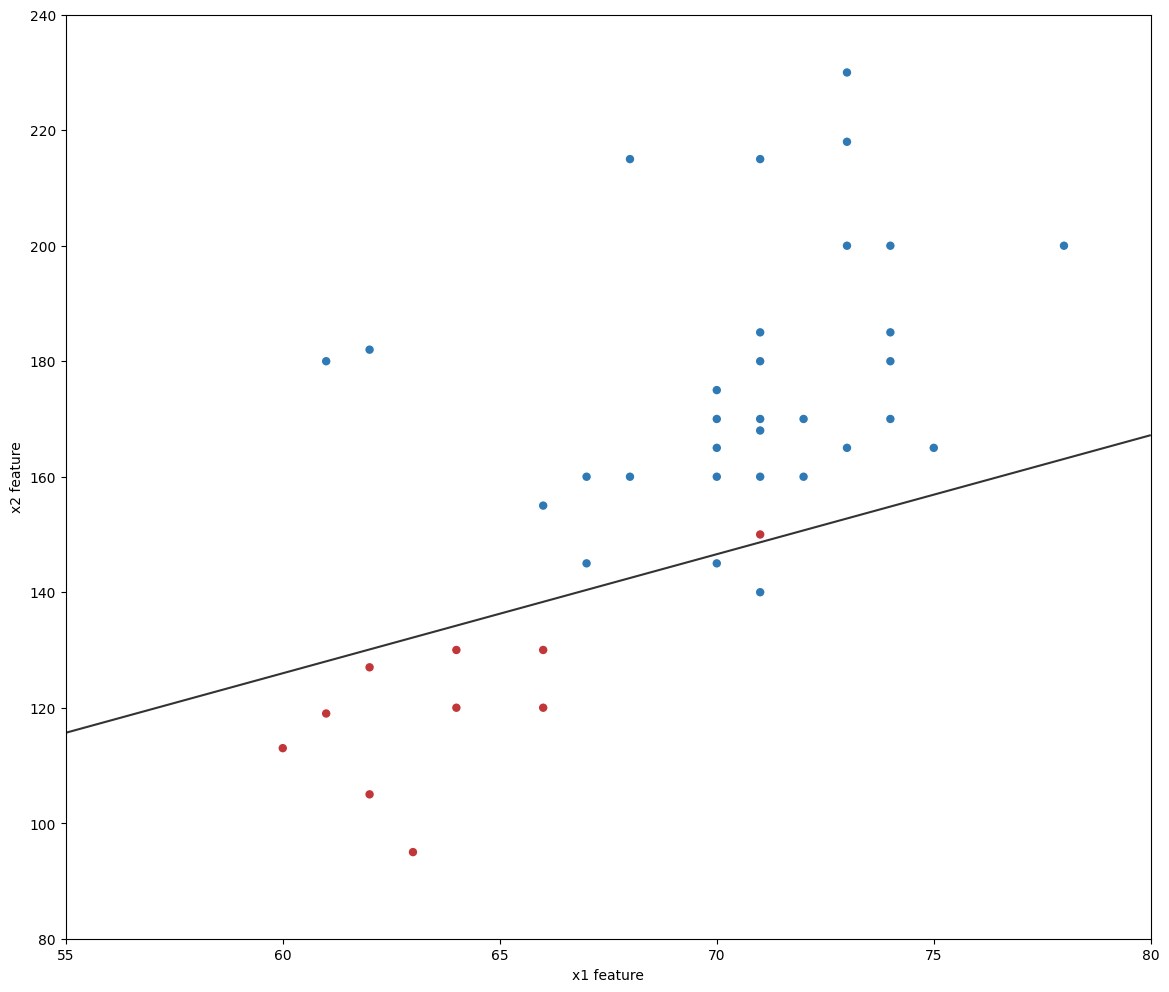

In [186]:
lr.scatterPlt()

As we see, we get the weights -0.4521 and 0.2193 with respect to x1 and x2 columns. 

In [187]:
# Removing point 1 and 39 from dataset(i.e having the index of 0 and 38 (list))
lr = LogisticRegression(epsilon=0.00001, learningRate = 0.000001, maxIteration = 100000, removeIndex = [0, 38])

  0%|          | 0/100000 [00:00<?, ?it/s]<ipython-input-181-20953e170db0>:52: RuntimeWarning: divide by zero encountered in log
  loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
<ipython-input-181-20953e170db0>:52: RuntimeWarning: invalid value encountered in multiply
  loss = y * np.log(sig) + (1 - y) * np.log(1 - sig)
 73%|███████▎  | 73209/100000 [00:03<00:01, 24236.54it/s]


The model stopped learning


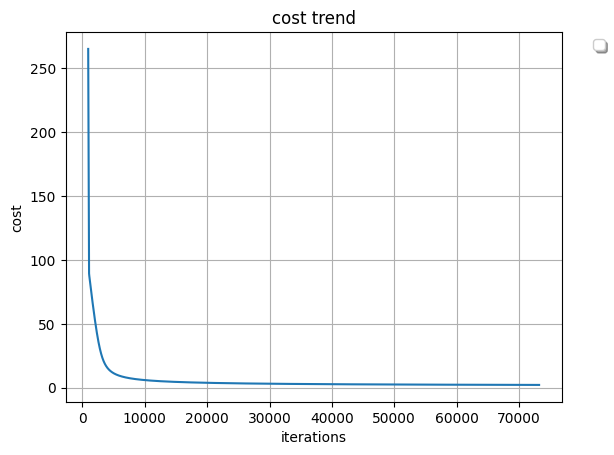

The model has precision of 1.0
The model has recall of 0.9714285714285714
The model has F1_score of 0.9855072463768115
The weights are [-0.61585779  0.29722345]


In [188]:
lr.fit()

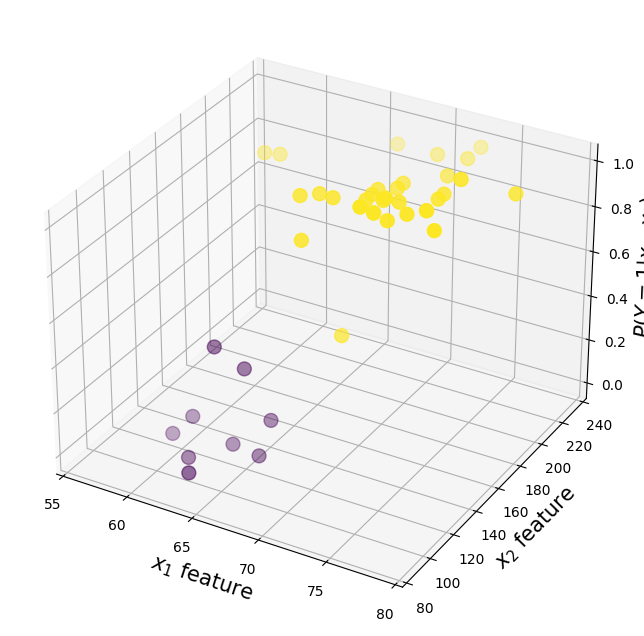

In [189]:
lr.plot()

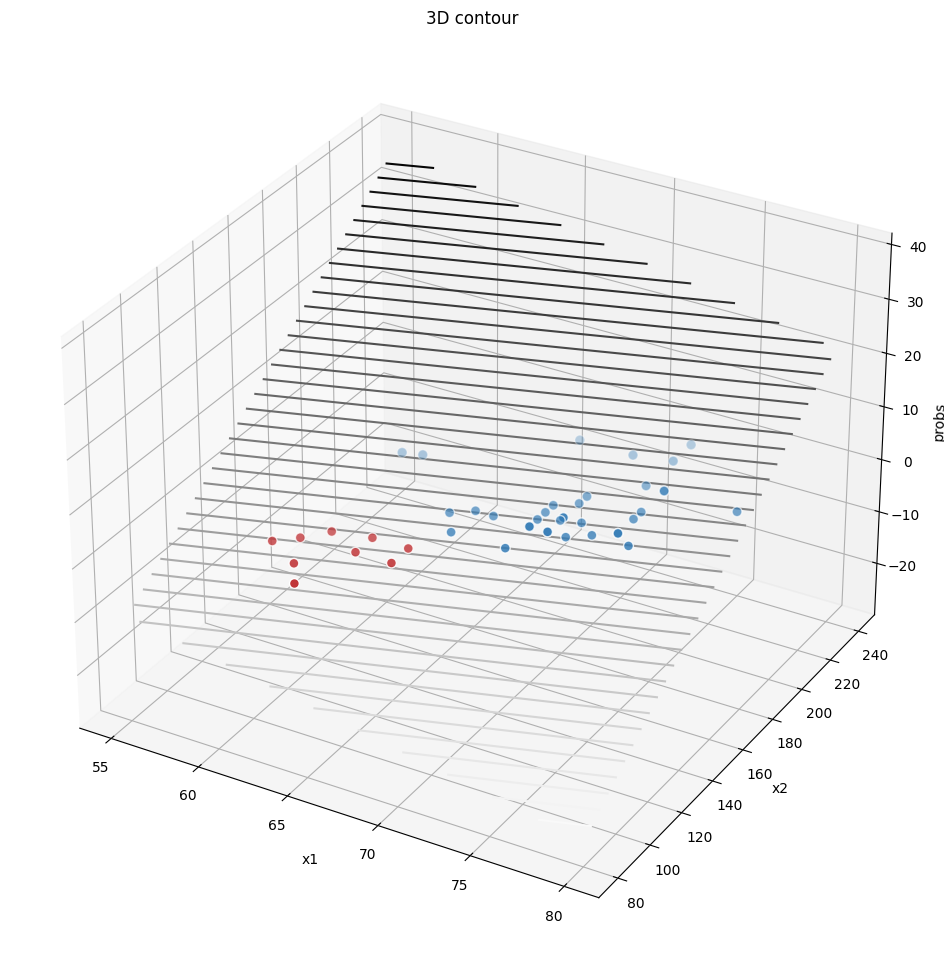

In [190]:
lr.plot3D()

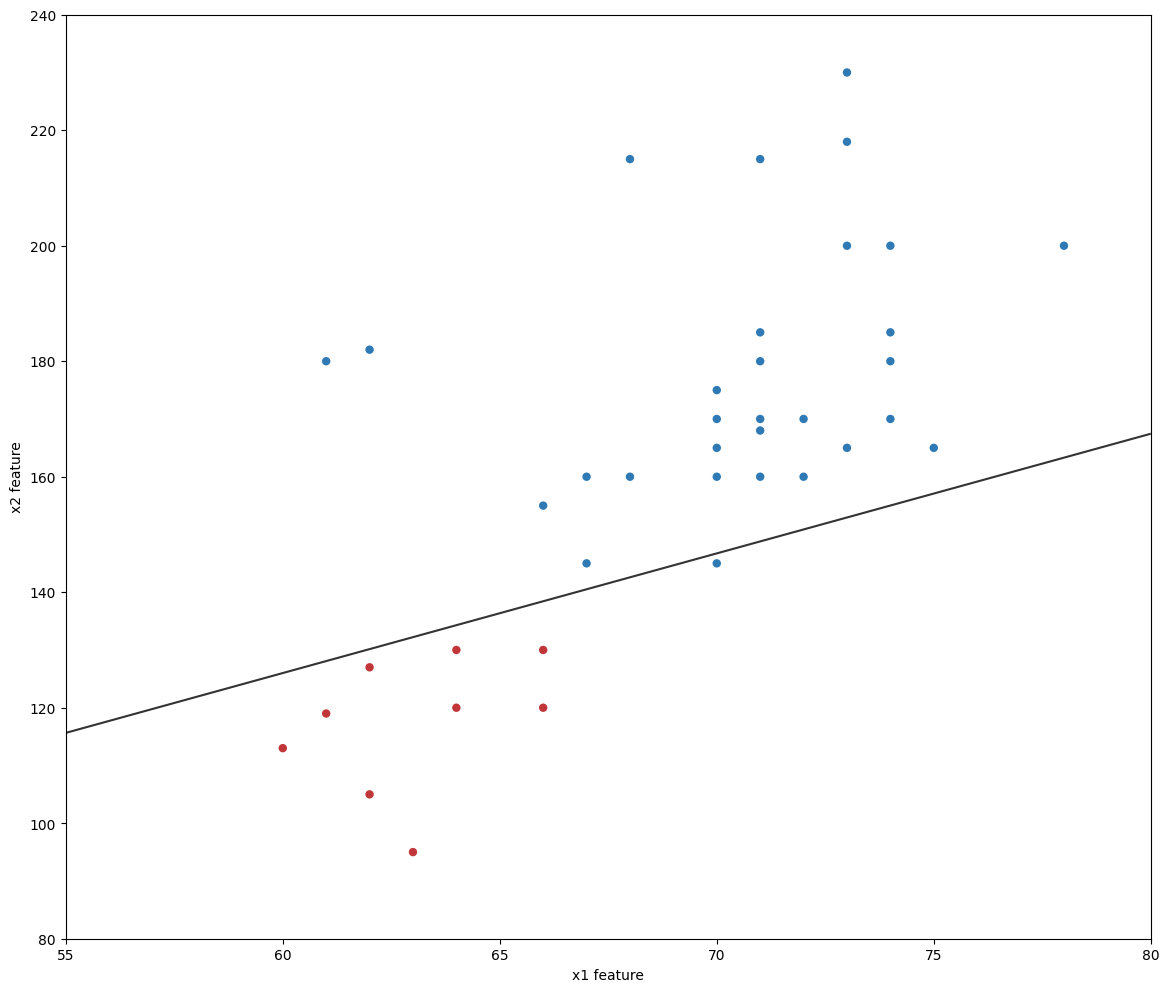

In [191]:
lr.scatterPlt()

After removing point 1 and 39, weight values changes significantly i.e. -0.6158 and 0.2972 respectively for x1 and x2 variable.\
The values are changing significantly as the removed values are outliers due to which the increase in precision can be observed